## **IMPORTS**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
brazil = pd.read_csv(
    filepath_or_buffer="../data/timeSeriesBrazil_process.csv",
    encoding="utf-8",
    sep=";",
    dtype={
        "year":"int",
        "state":"category",
        "month":"category",
        "number":"float",
        "date":"string"
    }
)
brazil.drop(columns=['Unnamed: 0'], inplace=True)
brazil['date'] = pd.to_datetime(arg=brazil['date'], format="%m/%d/%Y")

----------------------------------------

In [ ]:
bra

<Axes: title={'center': 'Number of Fires Over Time'}, xlabel='Years', ylabel='Fires Number'>

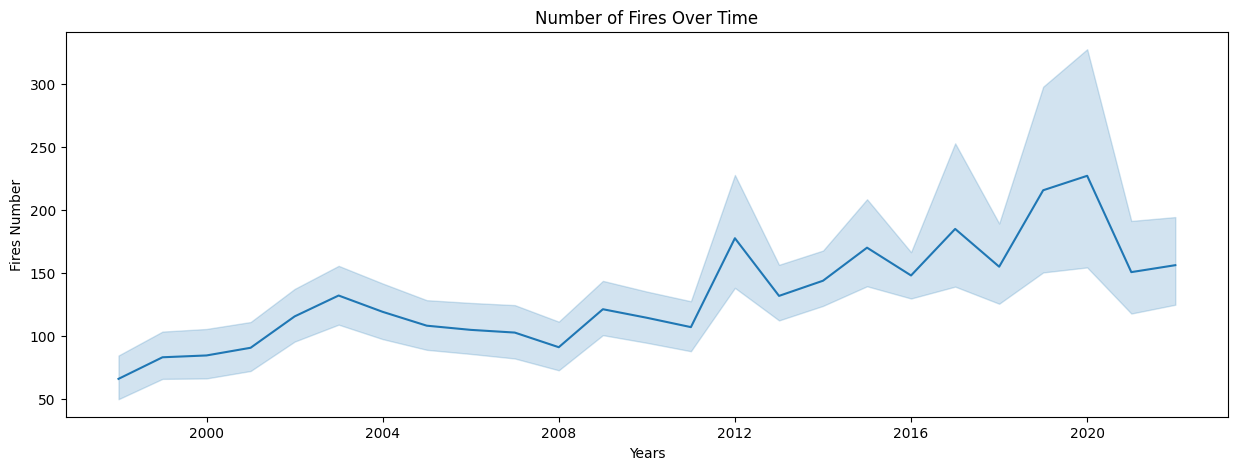

In [49]:
plt.figure(figsize=(15,5))
plt.title("Number of Fires Over Time")
plt.xlabel(xlabel="Years")
plt.ylabel(ylabel="Fires Number")
#fig, ax = plt.subplots()
sns.lineplot(x=brazil['date'], y=brazil['number'])
#sns.barplot(x=brazil['date'], y=brazil['number']) 

In [17]:
brazil

,year,state,month,number,date
0,2012,Acre,Janeiro,1.0,2012-01-01
1,2015,Acre,Janeiro,3.0,2015-01-01
2,2016,Acre,Janeiro,16.0,2016-01-01
3,2018,Acre,Janeiro,0.0,2018-01-01
4,2019,Acre,Janeiro,1.0,2019-01-01
...,...,...,...,...,...
9791,2012,Tocantins,Dezembro,128.0,2012-01-01
9792,2013,Tocantins,Dezembro,85.0,2013-01-01
9793,2014,Tocantins,Dezembro,223.0,2014-01-01
9794,2015,Tocantins,Dezembro,373.0,2015-01-01
